## Scripts for ISC analysis on Emotion EEG

### Basic setting

In [4]:
%matplotlib inline
import os
import mne
from mne.viz import plot_topomap
from mne.time_frequency import psd_multitaper, psd_welch
from mne.stats import fdr_correction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='grade3') 
import seaborn as sns
from sklearn.metrics import pairwise_distances
from nltools.stats import matrix_permutation, fdr
from scipy.spatial.distance import pdist
from nltools.stats import isc
from neurora.stuff import permutation_corr
from Function import import_eeg, singch_psd, mean_df2_eeg, mean_df3_eeg

### Subject list
sub_ag = [1, 2] + list(range(4,9)) + [10,13,14,17] + list(range(19,24)) + [25,26,28,29,30,31] + list(range(34,43)) + [46] # 32*
sub_ax = list(range(1,5)) + [7,8,10,12,13,14,15] + list(range(19,24)) + [25,26,28,29,30,31] + list(range(34,42)) + [43,44,46] # 33*
sub_fe = list(range(1,9)) + [10,12,14,17,19,20,21,22,23] + [25,26,28,29,30,31] + list(range(34,41)) + [42,44,46] # 33*
sub_hl = [1,2] + list(range(4,9)) + [10,12,13,14,15,17] + [19,20,21,22,23,25,26,28,29,30,31] + list(range(34,42)) + [43,44,46] # 35*
sub_ha = list(range(1,9)) +[10,12,13,14,15,17] + [19,20,21,22,23,25,26,28,29,31] + list(range(34,45)) + [46] # 36*


#subs exclusion

In [31]:
print(sub_fe)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 17, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 44, 46]


### Define data path

In [6]:
# Define the pathectory
ag_path = 'Scripts2Keyu/EEG/Angry/'
ax_path = 'Scripts2Keyu/EEG/Anxiety/'
fe_path = 'Scripts2Keyu/EEG/Fear/'
hl_path = 'Scripts2Keyu/EEG/Helpless/'
ha_path = 'Scripts2Keyu/EEG/Happy/'
rest_path = 'Scripts2Keyu/EEG/Resting/'
results_path = 'Scripts2Keyu/EEG/Results/0_ISC/EEG/'
plot_path = 'Scripts2Keyu/EEG/'

### Import emotion EEG datasets

In [8]:
# Import anxiety meta data
ax_sub, ax1_meta = import_eeg('ax1', os.path.join(ax_path,'ax1/'))
ax_sub, ax2_meta = import_eeg('ax2', os.path.join(ax_path,'ax2/'))

/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_046_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_034_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_002_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_012_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_013_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_003_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_035_ax1.set...


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_025_ax1.set...


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_001_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_011_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_008_ax1.set...
Not setting metadata
172 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_037_ax1.set...


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_045_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_009_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_019_ax1.set...


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_036_ax1.set...


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_026_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_044_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_010_ax1.set...
Not setting metadata
172 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_015_ax1.set...


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_023_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_033_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_041_ax1.set...
Not setting metadata
172 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_022_ax1.set...
Not setting metadata
172 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_040_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_014_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_004_ax1.set...


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_020_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_030_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_039_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_029_ax1.set...
Not setting metadata
172 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_016_ax1.set...
Not setting metadata
172 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_028_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_038_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_007_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_043_ax1.set...
Not setting metadata
172 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_031_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax1/sub_021_ax1.set...
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_012_ax2.set...
Not setting metadata


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_002_ax2.set...
Not setting metadata
175 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_046_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_034_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_025_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_035_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_003_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_013_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_008_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_037_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_045_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_011_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_001_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_010_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_019_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_009_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_026_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_036_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_044_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_033_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_023_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_041_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_015_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_004_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_014_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_022_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_040_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_029_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_039_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_016_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_030_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_020_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_043_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_021_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_031_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_038_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_028_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Anxiety/ax2/sub_007_ax2.set...
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


In [11]:
# Import happy meta data
ha_sub, ha1_meta = import_eeg('ha1', os.path.join(ha_path,'ha1/'))
ha_sub, ha3_meta = import_eeg('ha3', os.path.join(ha_path,'ha3/'))

Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_005_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_015_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_041_ha1.set...
Not setting metadata
260 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_023_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_033_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_040_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_022_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_014_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_004_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_020_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_042_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_006_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_016_ha1.set...
Not setting metadata
258 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_039_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_029_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_017_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_007_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_028_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_038_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_031_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_021_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_043_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_034_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_046_ha1.set...
Not setting metadata
260 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_002_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_012_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_013_ha1.set...
Not setting metadata
260 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_003_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_035_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_025_ha1.set...


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_001_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_011_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_045_ha1.set...
Not setting metadata
260 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_037_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_008_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_044_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_036_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_026_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_009_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_019_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha1/sub_010_ha1.set...
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_023_ha3.set...
Not setting metadata
247 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_033_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_041_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_005_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_015_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_014_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_004_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_022_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_040_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_039_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_029_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_006_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_016_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_042_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_020_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_043_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_031_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_021_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_028_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_038_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_017_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_007_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_002_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_012_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_046_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_034_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_035_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_025_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_013_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_003_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_008_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_037_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_045_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_001_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_011_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_010_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_009_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_019_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_036_ha3.set...
Not setting metadata
247 matching events found


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_026_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from /Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Scripts2Keyu/EEG/Happy/ha3/sub_044_ha3.set...
Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
Ready.


/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)
/Users/madwoman/Desktop/Emotional_Volatility/Emotion_Neurophysio_IS-RSA-main/Function.py:61: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  tp = mne.read_epochs_eeglab(file)


### Obtain channel index and topo information

In [12]:
# Obtain channel & montage information for topo-plot
topo_info = ag1_meta[1].info
# Obtain the channel names as a list
ch_names = ag1_meta[1].ch_names
# Crate a index list for channels
ch_idx = list(range(63))
# Combine the channels and index and convert to a dict
ch_names = dict(zip(ch_names, ch_idx))
print(ch_names['Fpz'])

59


In [13]:

print(topo_info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 250.0 Hz
>


### Section 2: ISC for *Anxiety* EEG

Anxiety annotation:
* ax1: 135 - 155
* ax2: 135 - 155

In [7]:
ch_idx = list(range(63))
r_topo = np.zeros((63,5))
simi = np.zeros((528,63,5))

psd1 = np.zeros((63,5,33,21))
for j in range(134, 155):
    ax = np.zeros((63,50,33))
    for sub in sub_ax:
        epoch = ax1_meta[sub][j]
        psds, freqs = psd_multitaper(epoch,fmin=1,fmax=50)
        psds = np.squeeze(10* np.log10(10**12*psds))
        idx = sub_ax.index(sub)
        ax[:,:,idx] = psds
    
    idx = range(134,155).index(j)
    psd1[:,0,:, idx] = ax[:,0:4,:].mean(1)
    psd1[:,1,:, idx] = ax[:,3:8,:].mean(1)
    psd1[:,2,:, idx] = ax[:,7:12,:].mean(1)
    psd1[:,3,:, idx] = ax[:,11:30,:].mean(1)
    psd1[:,4,:, idx] = ax[:,29:45,:].mean(1)

psd2 = np.zeros((63,5,33,21))
for j in range(134, 155):
    ax = np.zeros((63,50,33))
    for sub in sub_ax:
        epoch = ax2_meta[sub][j]
        psds, freqs = psd_multitaper(epoch,fmin=1,fmax=50)
        psds = np.squeeze(10* np.log10(10**12*psds))
        idx = sub_ax.index(sub)
        ax[:,:,idx] = psds
    
    idx = range(134,155).index(j)
    psd2[:,0,:, idx] = ax[:,0:4,:].mean(1)
    psd2[:,1,:, idx] = ax[:,3:8,:].mean(1)
    psd2[:,2,:, idx] = ax[:,7:12,:].mean(1)
    psd2[:,3,:, idx] = ax[:,11:30,:].mean(1)
    psd2[:,4,:, idx] = ax[:,29:45,:].mean(1)

    
psd = np.mean(np.stack((psd1, psd2),axis=4),axis=4)

for ch in ch_idx:
    simi_delta = 1-pdist(psd[ch,0,:,:], metric='correlation')
    simi[:,ch,0] = simi_delta
    r_topo[ch,0] = simi_delta.mean()

    simi_theta = 1-pdist(psd[ch,1,:,:], metric='correlation')
    simi[:,ch,1] = simi_theta
    r_topo[ch,1] = simi_theta.mean()

    simi_alpha = 1-pdist(psd[ch,2,:,:], metric='correlation')
    simi[:,ch,2] = simi_alpha
    r_topo[ch,2] = simi_alpha.mean()

    simi_beta = 1-pdist(psd[ch,3,:,:], metric='correlation')
    simi[:,ch,3] = simi_beta
    r_topo[ch,3] = simi_beta.mean()

    simi_gamma = 1-pdist(psd[ch,4,:,:], metric='correlation')
    simi[:,ch,4] = simi_gamma
    r_topo[ch,4] = simi_gamma.mean()

isc = {'r_topo':r_topo, 'matrix':simi}
np.save(os.path.join(results_path, 'ax_isc_matrix.npy'), isc) 

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

### Anxiety ISC topoplots

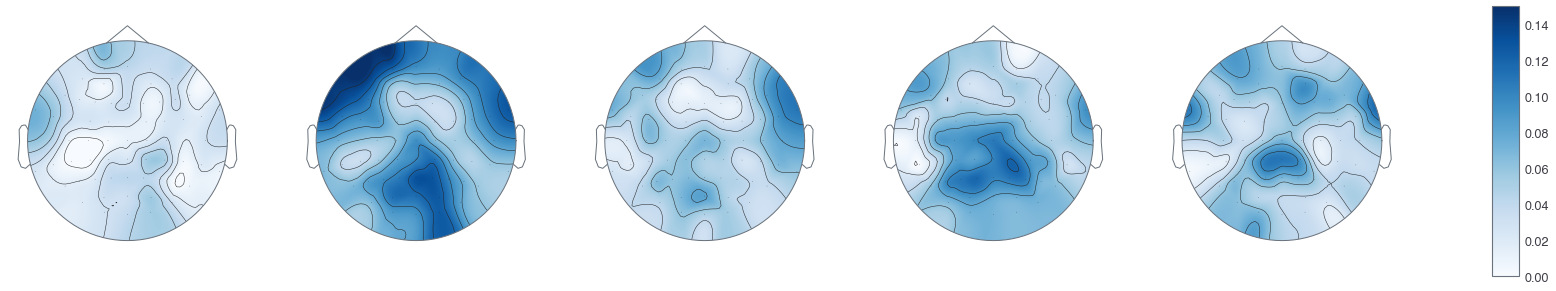

<Figure size 460.8x403.2 with 0 Axes>

In [8]:
isc = np.load(os.path.join(results_path, 'ax_isc_matrix.npy'), allow_pickle=True).item()
r_topo = isc['r_topo']

fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(25,15))
im,_ = plot_topomap(r_topo[:,0], topo_info, axes=ax1, show=False, vmin=0, vmax=0.15, cmap='Blues',sphere=0.13)
im,_ = plot_topomap(r_topo[:,1], topo_info, axes=ax2, show=False, vmin=0, vmax=0.15,  cmap='Blues',sphere=0.13)    
im,_ = plot_topomap(r_topo[:,2], topo_info, axes=ax3, show=False, vmin=0, vmax=0.15,  cmap='Blues',sphere=0.13)    
im,_ = plot_topomap(r_topo[:,3], topo_info, axes=ax4, show=False, vmin=0, vmax=0.15, cmap='Blues',sphere=0.13)    
im,_ = plot_topomap(r_topo[:,4], topo_info, axes=ax5, show=False, vmin=0, vmax=0.15, cmap='Blues',sphere=0.13)  
# ax1.set_title('Delta',fontsize=20) 
# ax2.set_title('Theta',fontsize=20) 
# ax3.set_title('Alpha',fontsize=20) 
# ax4.set_title('Beta',fontsize=20) 
# ax5.set_title('Gamma',fontsize=20) 
ax_x_start, ax_x_width, ax_y_start, ax_y_height  = 0.95, 0.015, 0.4, 0.25
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
#fig.suptitle('Anxiety ISC', x=0.5, y=0.75, fontsize=30, fontweight='bold')
plt.show()
plt.savefig('Scripts2Keyu/EEG/Results/ax_psd_isc.png',bbox_inches='tight',dpi=600,pad_inches=0.1)
# plt.close()

### Section 5: ISC for *happy* EEG

 Happy dataset annotations:
* ha1: 180 - 200
* ha3: 5 - 25

In [13]:
ch_idx = list(range(63))

r_topo = np.zeros((63,5))
simi = np.zeros((630,63,5))

psd1 = np.zeros((63,5,36,21))
for j in range(179, 200):
    ha = np.zeros((63,50,36))
    for sub in sub_ha:
        epoch = ha1_meta[sub][j]
        psds, freqs = psd_multitaper(epoch,fmin=1,fmax=50)
        psds = np.squeeze(10* np.log10(10**12*psds))
        idx = sub_ha.index(sub)
        ha[:,:,idx] = psds
    
    idx = range(179,200).index(j)
    psd1[:,0,:, idx] = ha[:,0:4,:].mean(1)
    psd1[:,1,:, idx] = ha[:,3:8,:].mean(1)
    psd1[:,2,:, idx] = ha[:,7:12,:].mean(1)
    psd1[:,3,:, idx] = ha[:,11:30,:].mean(1)
    psd1[:,4,:, idx] = ha[:,29:45,:].mean(1)

psd3 = np.zeros((63,5,36,21))
for j in range(4, 25):
    ha = np.zeros((63,50,36))
    for sub in sub_ha:
        epoch = ha3_meta[sub][j]
        psds, freqs = psd_multitaper(epoch,fmin=1,fmax=50)
        psds = np.squeeze(10* np.log10(10**12*psds))
        idx = sub_ha.index(sub)
        ha[:,:,idx] = psds
    
    idx = range(4,25).index(j)
    psd3[:,0,:, idx] = ha[:,0:4,:].mean(1)
    psd3[:,1,:, idx] = ha[:,3:8,:].mean(1)
    psd3[:,2,:, idx] = ha[:,7:12,:].mean(1)
    psd3[:,3,:, idx] = ha[:,11:30,:].mean(1)
    psd3[:,4,:, idx] = ha[:,29:45,:].mean(1)
    
psd = np.mean(np.stack((psd1, psd3),axis=4),axis=4)

for ch in ch_idx:
    simi_delta = 1-pdist(psd[ch,0,:,:], metric='correlation')
    simi[:,ch,0] = simi_delta
    r_topo[ch,0] = simi_delta.mean()

    simi_theta = 1-pdist(psd[ch,1,:,:], metric='correlation')
    simi[:,ch,1] = simi_theta
    r_topo[ch,1] = simi_theta.mean()

    simi_alpha = 1-pdist(psd[ch,2,:,:], metric='correlation')
    simi[:,ch,2] = simi_alpha
    r_topo[ch,2] = simi_alpha.mean()

    simi_beta = 1-pdist(psd[ch,3,:,:], metric='correlation')
    simi[:,ch,3] = simi_beta
    r_topo[ch,3] = simi_beta.mean()

    simi_gamma = 1-pdist(psd[ch,4,:,:], metric='correlation')
    simi[:,ch,4] = simi_gamma
    r_topo[ch,4] = simi_gamma.mean()

isc = {'r_topo':r_topo, 'matrix':simi}
np.save(os.path.join(results_path, 'ha_isc_matrix1.npy'), isc) 

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

### Happy ISC topoplots

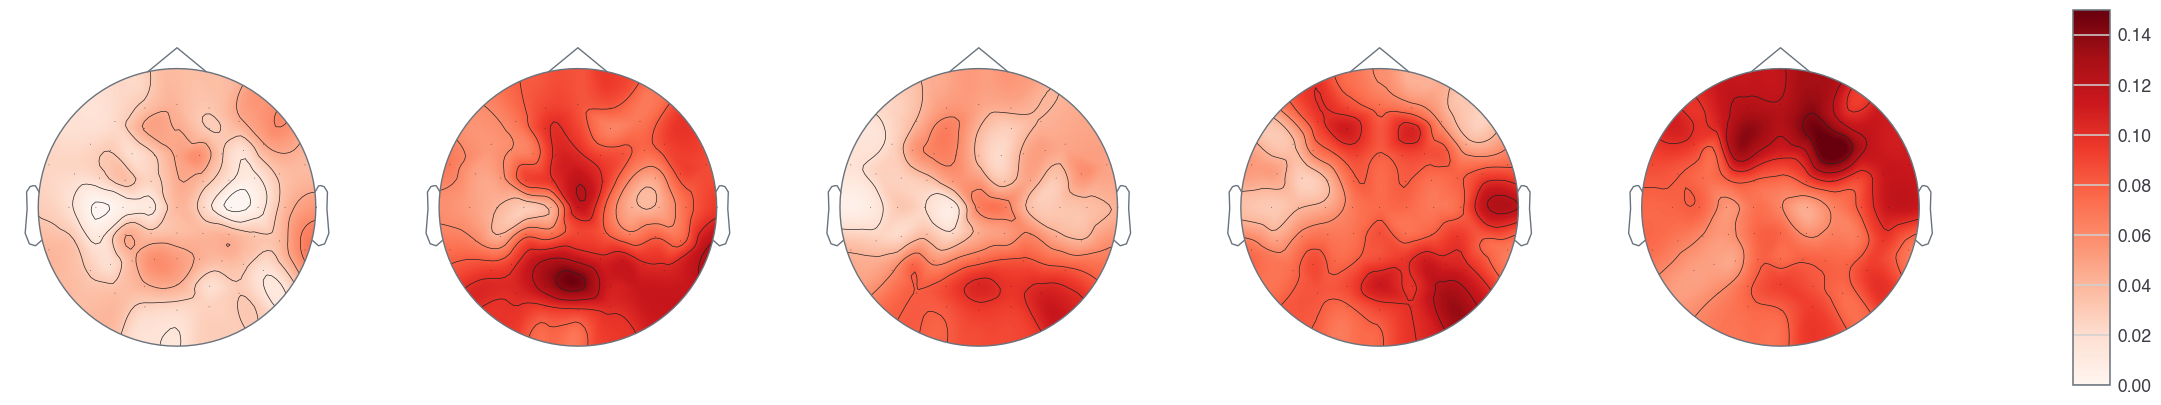

In [14]:
isc = np.load(os.path.join(results_path, 'ha_isc_matrix1.npy'), allow_pickle=True).item()
r_topo = isc['r_topo']

fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(25,15))
im,_ = plot_topomap(r_topo[:,0], topo_info, axes=ax1, show=False, vmin=0, vmax=0.15, cmap='Reds',sphere=0.13)
im,_ = plot_topomap(r_topo[:,1], topo_info, axes=ax2, show=False, vmin=0, vmax=0.15,  cmap='Reds',sphere=0.13)    
im,_ = plot_topomap(r_topo[:,2], topo_info, axes=ax3, show=False, vmin=0, vmax=0.15,  cmap='Reds',sphere=0.13)    
im,_ = plot_topomap(r_topo[:,3], topo_info, axes=ax4, show=False, vmin=0, vmax=0.15, cmap='Reds',sphere=0.13)    
im,_ = plot_topomap(r_topo[:,4], topo_info, axes=ax5, show=False, vmin=0, vmax=0.15, cmap='Reds',sphere=0.13)  
# ax1.set_title('Delta',fontsize=20) 
# ax2.set_title('Theta',fontsize=20) 
# ax3.set_title('Alpha',fontsize=20) 
# ax4.set_title('Beta',fontsize=20) 
# ax5.set_title('Gamma',fontsize=20) 
ax_x_start, ax_x_width, ax_y_start, ax_y_height  = 0.95, 0.015, 0.4, 0.25
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
# fig.suptitle('Happy ISC', x=0.5, y=0.75, fontsize=30, fontweight='bold')
plt.show()
# plt.savefig('F:/1_Emotion_Data/Results/2_Plots/ISC/EEG/ha_psd_isc.png',bbox_inches='tight',dpi=600,pad_inches=0.1)
# plt.close()